In [11]:
using Pkg
Pkg.status()

Status `~/Documents/Research Professor/Mikhail Erementchouk/HN_V2/Project.toml`
  [634d3b9d] DrWatson v2.19.1
  [e9467ef8] GLMakie v0.13.7
  [28b8d3ca] GR v0.73.19
  [c8e1da08] IterTools v1.10.0
  [b964fa9f] LaTeXStrings v1.4.0
  [91a5bcdd] Plots v1.41.1


In [1]:
include(raw"C:\Users\qz202\Downloads\Share to Windows\Share to Windows\Research Professor\Mikhail Erementchouk\HN_V2\scripts\intro.jl")
using Graphs
using SimpleWeightedGraphs
using Dice 
using PrettyTables
using LinearAlgebra

using GraphPlot
using Plots
using StatsPlots
using HNProcess
using DataRefine
using PartitioningData
using IterTools
using Random

Currently active project is: HN_V2

Path of active project: C:\Users\qz202\Downloads\Share to Windows\Share to Windows\Research Professor\Mikhail Erementchouk\HN_V2

Have fun with your new project!

You can help us improve DrWatson by opening
issues on GitHub, submitting feature requests,
or even opening your own Pull Requests!


  Activating project at `C:\Users\qz202\Downloads\Share to Windows\Share to Windows\Research Professor\Mikhail Erementchouk\HN_V2`


In [2]:
sim_time = 4
steps = 3000
detail = 100
parameters = Dict{String, Any}(
    "images" => three_random_orthogonal_image(64),
    "sim_time" => sim_time,
    "steps" => steps,
    "iterations" => 100, #Num of times attempted
    "num_agitations" => 1,
    "scaling" => 1.0,
    "delta" => -1* sim_time/steps,
    # This is the region that we will provide and the machine must keep this region constant
    # Will be a vector of tuples which are (row, col, state)
    "initial_stimuli" => [(1,1,1)]
)
println(length(parameters["images"]))

3


# V2

In [3]:
conv_16 = 0
twos_16 = 0 
others_16 = 0
elp = @elapsed begin
    for i in 1:detail
        parameters["images"] = three_random_orthogonal_image(16)
        r = HN_Solver(parameters)
        sol_count = 0 
        rots = iterative_rotater_state(r,parameters)
        for st in rots
            if (reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
                -1 .*reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])
                sol_count +=1 
            end
        end
        if sol_count > 0
            conv_16 += 1
        end
        if sol_count == 2
            twos_16 += 1 
        end
        if sol_count > 2
            others_16 += 1 
        end
    end
end
println("Number of convs: $(conv_16)")
println("Number of twos: $(twos_16)")
println("Number of more than two sols: $(others_16)")
println("took $elp seconds")

Number of convs: 100
Number of twos: 96
Number of more than two sols: 0
took 0.877204166 seconds


In [3]:
conv_64 = 0
twos_64 = 0 
others_64 = 0
elp = @elapsed begin
    for i in 1:detail
        parameters["images"] = three_random_orthogonal_image(64)
        r = HN_Solver(parameters)
        sol_count = 0 
        rots = iterative_rotater_state(r,parameters)
        for st in rots
            if (reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
                -1 .*reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])
                sol_count +=1 
            end
        end
        if sol_count > 0
            conv_64 += 1
        end
        if sol_count == 2
            twos_64 += 1 
        end
        if sol_count > 2
            others_64 += 1 
        end
    end
end
println("Number of convs: $(conv_64)")
println("Number of twos: $(twos_64)")
println("Number of more than two sols: $(others_64)")
println("took $elp seconds")

Number of convs: 100
Number of twos: 90
Number of more than two sols: 0
took 12.102461875 seconds


In [4]:
conv_256 = 0
twos_256 = 0 
others_256 = 0
elp = @elapsed begin
    for i in 1:detail
        parameters["images"] = three_random_orthogonal_image(256)
        r = HN_Solver(parameters)
        sol_count = 0 
        rots = iterative_rotater_state(r,parameters)
        for st in rots
            if (reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
                -1 .*reshape(st[1],size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])
                sol_count +=1 
            end
        end
        if sol_count > 0
            conv_256 += 1
        end
        if sol_count == 2
            twos_256 += 1 
        end
        if sol_count > 2
            others_256 += 1 
        end
    end
end
println("Number of convs: $(conv_256)")
println("Number of twos: $(twos_256)")
println("Number of more than two sols: $(others_256)")
println("took $elp seconds")

LoadError: InterruptException:

In [13]:
sizes = ["16", "64", "256"]
convs = [conv_16, conv_64, conv_256]
twos = [twos_16, twos_64, twos_256]

# Note, others is impossible because of thm 6 proven. 

p = groupedbar(
    sizes, 
    [convs twos],
    bar_position = :dodge,
    labels = ["At least one (1+)" "At least two (2+)"],
    xlabel="Pixel Count (N)",
    ylabel="Probability of Convergence",
    legendtitle="Images Found",
    legend = :outerright,
    dpi = 400,
   
)
@show p
savefig(p, "ThreeOrthogonalImages_V2_detail_$(detail).png")

p = Plot{Plots.GRBackend() n=2}


"/Users/quaidzahid/Documents/Research Professor/Mikhail Erementchouk/HN_V2/scripts/Paper Figures/ThreeOrthogonalImages_V2_detail_100.png"


# HN OG

In [33]:
hn_conv_16 = 0
elp = @elapsed begin
    for i in 1:100
        parameters["images"] = three_random_orthogonal_image(16)
        r = HN_og(parameters)
        if (reshape(r,size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
            -1 .*reshape(r,size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])
            hn_conv_16 +=1 
        end
    end
end
println(hn_conv_16)
println("took $elp seconds")

77
took 0.149758 seconds


In [35]:
hn_conv_64 = 0
elp = @elapsed begin
    for i in 1:5
        parameters["images"] = three_random_orthogonal_image(64)
        r = HN_og(parameters)
        if (reshape(r,size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
            -1 .*reshape(r,size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])
            hn_conv_64 +=1 
        end
    end
end
println(hn_conv_64)
println("took $elp seconds")

3
took 0.137305375 seconds


In [36]:
hn_conv_256 = 0
elp = @elapsed begin
    for i in 1:5
        parameters["images"] = three_random_orthogonal_image(256)
        r = HN_og(parameters)
        if (reshape(r,size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"] ||
            -1 .*reshape(r,size(parameters["images"][1],1),size(parameters["images"][1],1)) in parameters["images"])
            hn_conv_256 +=1 
        end
    end
end
println(hn_conv_256)
println("took $elp seconds")

1
took 3.65883025 seconds


┌ Warning: Keyword argument bar_position not supported with Plots.GRBackend().  Choose from: annotationcolor, annotationfontfamily, annotationfontsize, annotationhalign, annotationrotation, annotations, annotationvalign, arrow, aspect_ratio, axis, background_color, background_color_inside, background_color_outside, background_color_subplot, bar_width, bins, bottom_margin, camera, clims, color_palette, colorbar, colorbar_entry, colorbar_scale, colorbar_title, colorbar_titlefont, colorbar_titlefontcolor, colorbar_titlefontrotation, colorbar_titlefontsize, connections, contour_labels, discrete_values, fill, fill_z, fillalpha, fillcolor, fillrange, fillstyle, flip, fontfamily, fontfamily_subplot, foreground_color, foreground_color_axis, foreground_color_border, foreground_color_grid, foreground_color_subplot, foreground_color_text, formatter, framestyle, grid, gridalpha, gridlinewidth, gridstyle, group, guide, guidefont, guidefontcolor, guidefontfamily, guidefonthalign, guidefontrotation, 

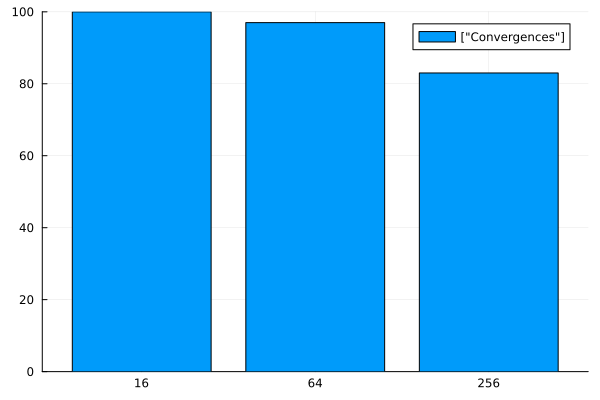

In [32]:
sizes = ["16", "64", "256"]
convs = [hn_conv_16, hn_conv_64, hn_conv_256]

bar(sizes, convs, bar_position = :dodge,
           labels = ["Convergences"])

In [22]:
include("/Users/quaidzahid/Documents/Research Professor/Mikhail Erementchouk/HN_V2/scripts/intro.jl")
using Graphs
using SimpleWeightedGraphs
using Dice 
using PrettyTables
using LinearAlgebra

using GraphPlot
using Plots
using StatsPlots
using HNProcess
using DataRefine
using PartitioningData
using IterTools
using Random


function experiment_64_v2(params, detail)
    conv_64 = 0
    twos_64 = 0 
    others_64 = 0
    elp = @elapsed begin
        for i in 1:detail
            params["images"] = three_random_orthogonal_image(64)
            r = HN_Solver(params)
            sol_count = 0 
            rots = iterative_rotater_state(r,params)
            for st in rots
                if (reshape(st[1],size(params["images"][1],1),size(params["images"][1],1)) in params["images"] ||
                    -1 .*reshape(st[1],size(params["images"][1],1),size(params["images"][1],1)) in params["images"])
                    sol_count +=1 
                end
            end
            if sol_count > 0
                conv_64 += 1
            end
            if sol_count == 2
                twos_64 += 1 
            end
            if sol_count > 2
                others_64 += 1 
            end
        end
    end
    println("Number of convs: $(conv_64)")
    println("Number of twos: $(twos_64)")
    println("Number of more than two sols: $(others_64)")
    println("took $elp seconds")
    
    d_64 =  Dict{String, Any}(
        "conv_64" => conv_64,
        "twos_64" => twos_64, 
        "others_64" => others_64
        )
    
    record_data(d_64, params, "ThreeOrthogonal_V2_8x8_Raw_Data_detail_$(detail)")
    return [conv_64, twos_64, others_64]
end 

function experiment_256_v2(params, detail)
    conv_256 = 0
    twos_256 = 0 
    others_256 = 0
    elp = @elapsed begin
        for i in 1:detail
            params["images"] = three_random_orthogonal_image(256)
            r = HN_Solver(params)
            sol_count = 0 
            rots = iterative_rotater_state(r,params)
            for st in rots
                if (reshape(st[1],size(params["images"][1],1),size(params["images"][1],1)) in params["images"] ||
                    -1 .*reshape(st[1],size(params["images"][1],1),size(params["images"][1],1)) in params["images"])
                    sol_count +=1 
                end
            end
            if sol_count > 0
                conv_256 += 1
            end
            if sol_count == 2
                twos_256 += 1 
            end
            if sol_count > 2
                others_256 += 1 
            end
        end
    end
    println("Number of convs: $(conv_256)")
    println("Number of twos: $(twos_256)")
    println("Number of more than two sols: $(others_256)")
    println("took $elp seconds")
    
    d_256 =  Dict{String, Any}(
        "conv_256" => conv_256,
        "twos_256" => twos_256, 
        "others_256" => others_256
        )
    
    record_data(d_256, params, "ThreeOrthogonal_V2_16x16_Raw_Data_detail_$(detail)")
    return [conv_256, twos_256, others_256]
end 

function experiment_64_hn(params, detail)
    hn_conv_64 = 0
    elp = @elapsed begin
        for i in 1:detail
            params["images"] = three_random_orthogonal_image(64)
            r = HN_Solver(params)
            if (reshape(r[1],size(params["images"][1],1),size(params["images"][1],1)) in params["images"] ||
                -1 .*reshape(r[1],size(params["images"][1],1),size(params["images"][1],1)) in params["images"])
                hn_conv_64 +=1 
            end
        end
    end
    print("hi")
    println(hn_conv_64)
    print("hi")
    println("took $elp seconds")
    d_64 =  Dict{String, Any}(
        "conv_64" => hn_conv_64,
        )
    record_data(d_64, params, "ThreeOrthogonal_HN_8x8_Raw_Data_detail_$(detail)")
    return hn_conv_64
end

function experiment_256_hn(params, detail)
    hn_conv_256 = 0
    elp = @elapsed begin
        for i in 1:detail
            params["images"] = three_random_orthogonal_image(256)
            r = HN_Solver(params)
            if (reshape(r[1],size(params["images"][1],1),size(params["images"][1],1)) in params["images"] ||
                -1 .*reshape(r[1],size(params["images"][1],1),size(params["images"][1],1)) in params["images"])
                hn_conv_256 +=1 
            end
        end
    end
    println(hn_conv_256)
    println("took $elp seconds")

    d_256 =  Dict{String, Any}(
        "conv_256" => hn_conv_256,
        )
    record_data(d_256, params, "ThreeOrthogonal_HN_16x16_Raw_Data_detail_$(detail)")

    return hn_conv_256
end

sim_time = 4
steps = 3000
detail = 5
parameters = Dict{String, Any}(
    "images" => three_random_orthogonal_image(64),
    "sim_time" => sim_time,
    "steps" => steps,
    "iterations" => 100, #Num of times attempted
    "num_agitations" => 1,
    "scaling" => 1.0,
    "delta" => -1* sim_time/steps,
    # This is the region that we will provide and the machine must keep this region constant
    # Will be a vector of tuples which are (row, col, state)
    "initial_stimuli" => [(1,1,1)]
)
println(length(parameters["images"]))

println("\n V2: 8 by 8 time! \n")

exp_8x8_v2 = experiment_64_v2(parameters, detail)

println("\n V2: 16 by 16 time! \n")

exp_16x16_v2 = experiment_256_v2(parameters, detail)

println("\n HN: 8 by 8 time! \n")

exp_8x8_hn = experiment_64_hn(parameters, detail)

println("\n HN: 16 by 16 time! \n")

exp_16x16_hn = experiment_256_hn(parameters, detail)

println("\n Graph time! \n")

sizes = ["64", "256"]
convs = [exp_8x8_v2[1]/detail, exp_16x16_v2[1]/detail]
twos = [exp_8x8_v2[2]/detail, exp_16x16_v2[2]/detail]
hns = [exp_8x8_hn/detail, exp_16x16_hn/detail]
# Note, others is impossible because of thm 6 proven. 

p = groupedbar(
    sizes, 
    [convs twos hns],
    #bar_position = :dodge,
    labels = ["V2: At least one (1+)" "V2: Two" "Traditional Hopfield Networks"],
    xlabel="Pixel Count (N)",
    ylabel="Probability of Convergence",
    legendtitle="Images Found",
    ylims = (0, 1.05),
    legend = :outerright,
    dpi = 400,
   
)
@show p
savefig(p, "ThreeOrthogonalImages_V2_detail_$(detail).png")

Currently active project is: HN_V2

Path of active project: /Users/quaidzahid/Documents/Research Professor/Mikhail Erementchouk/HN_V2

Have fun with your new project!

You can help us improve DrWatson by opening
issues on GitHub, submitting feature requests,
or even opening your own Pull Requests!

3

 V2: 8 by 8 time! 

Number of convs: 5
Number of twos: 5
Number of more than two sols: 0
took 0.60197475 seconds
The results are saved to ThreeOrthogonal_V2_8x8_Raw_Data_detail_5

 V2: 16 by 16 time! 

Number of convs: 5
Number of twos: 5
Number of more than two sols: 0
took 11.896075666 seconds
The results are saved to ThreeOrthogonal_V2_16x16_Raw_Data_detail_5

 HN: 8 by 8 time! 

hi5
hitook 0.5878845 seconds
The results are saved to ThreeOrthogonal_HN_8x8_Raw_Data_detail_5

 HN: 16 by 16 time! 

3
took 12.249577625 seconds
The results are saved to ThreeOrthogonal_HN_16x16_Raw_Data_detail_5

 Graph time! 

p = Plot{Plots.GRBackend() n=3}


"/Users/quaidzahid/Documents/Research Professor/Mikhail Erementchouk/HN_V2/scripts/Paper Figures/ThreeOrthogonalImages_V2_detail_5.png"

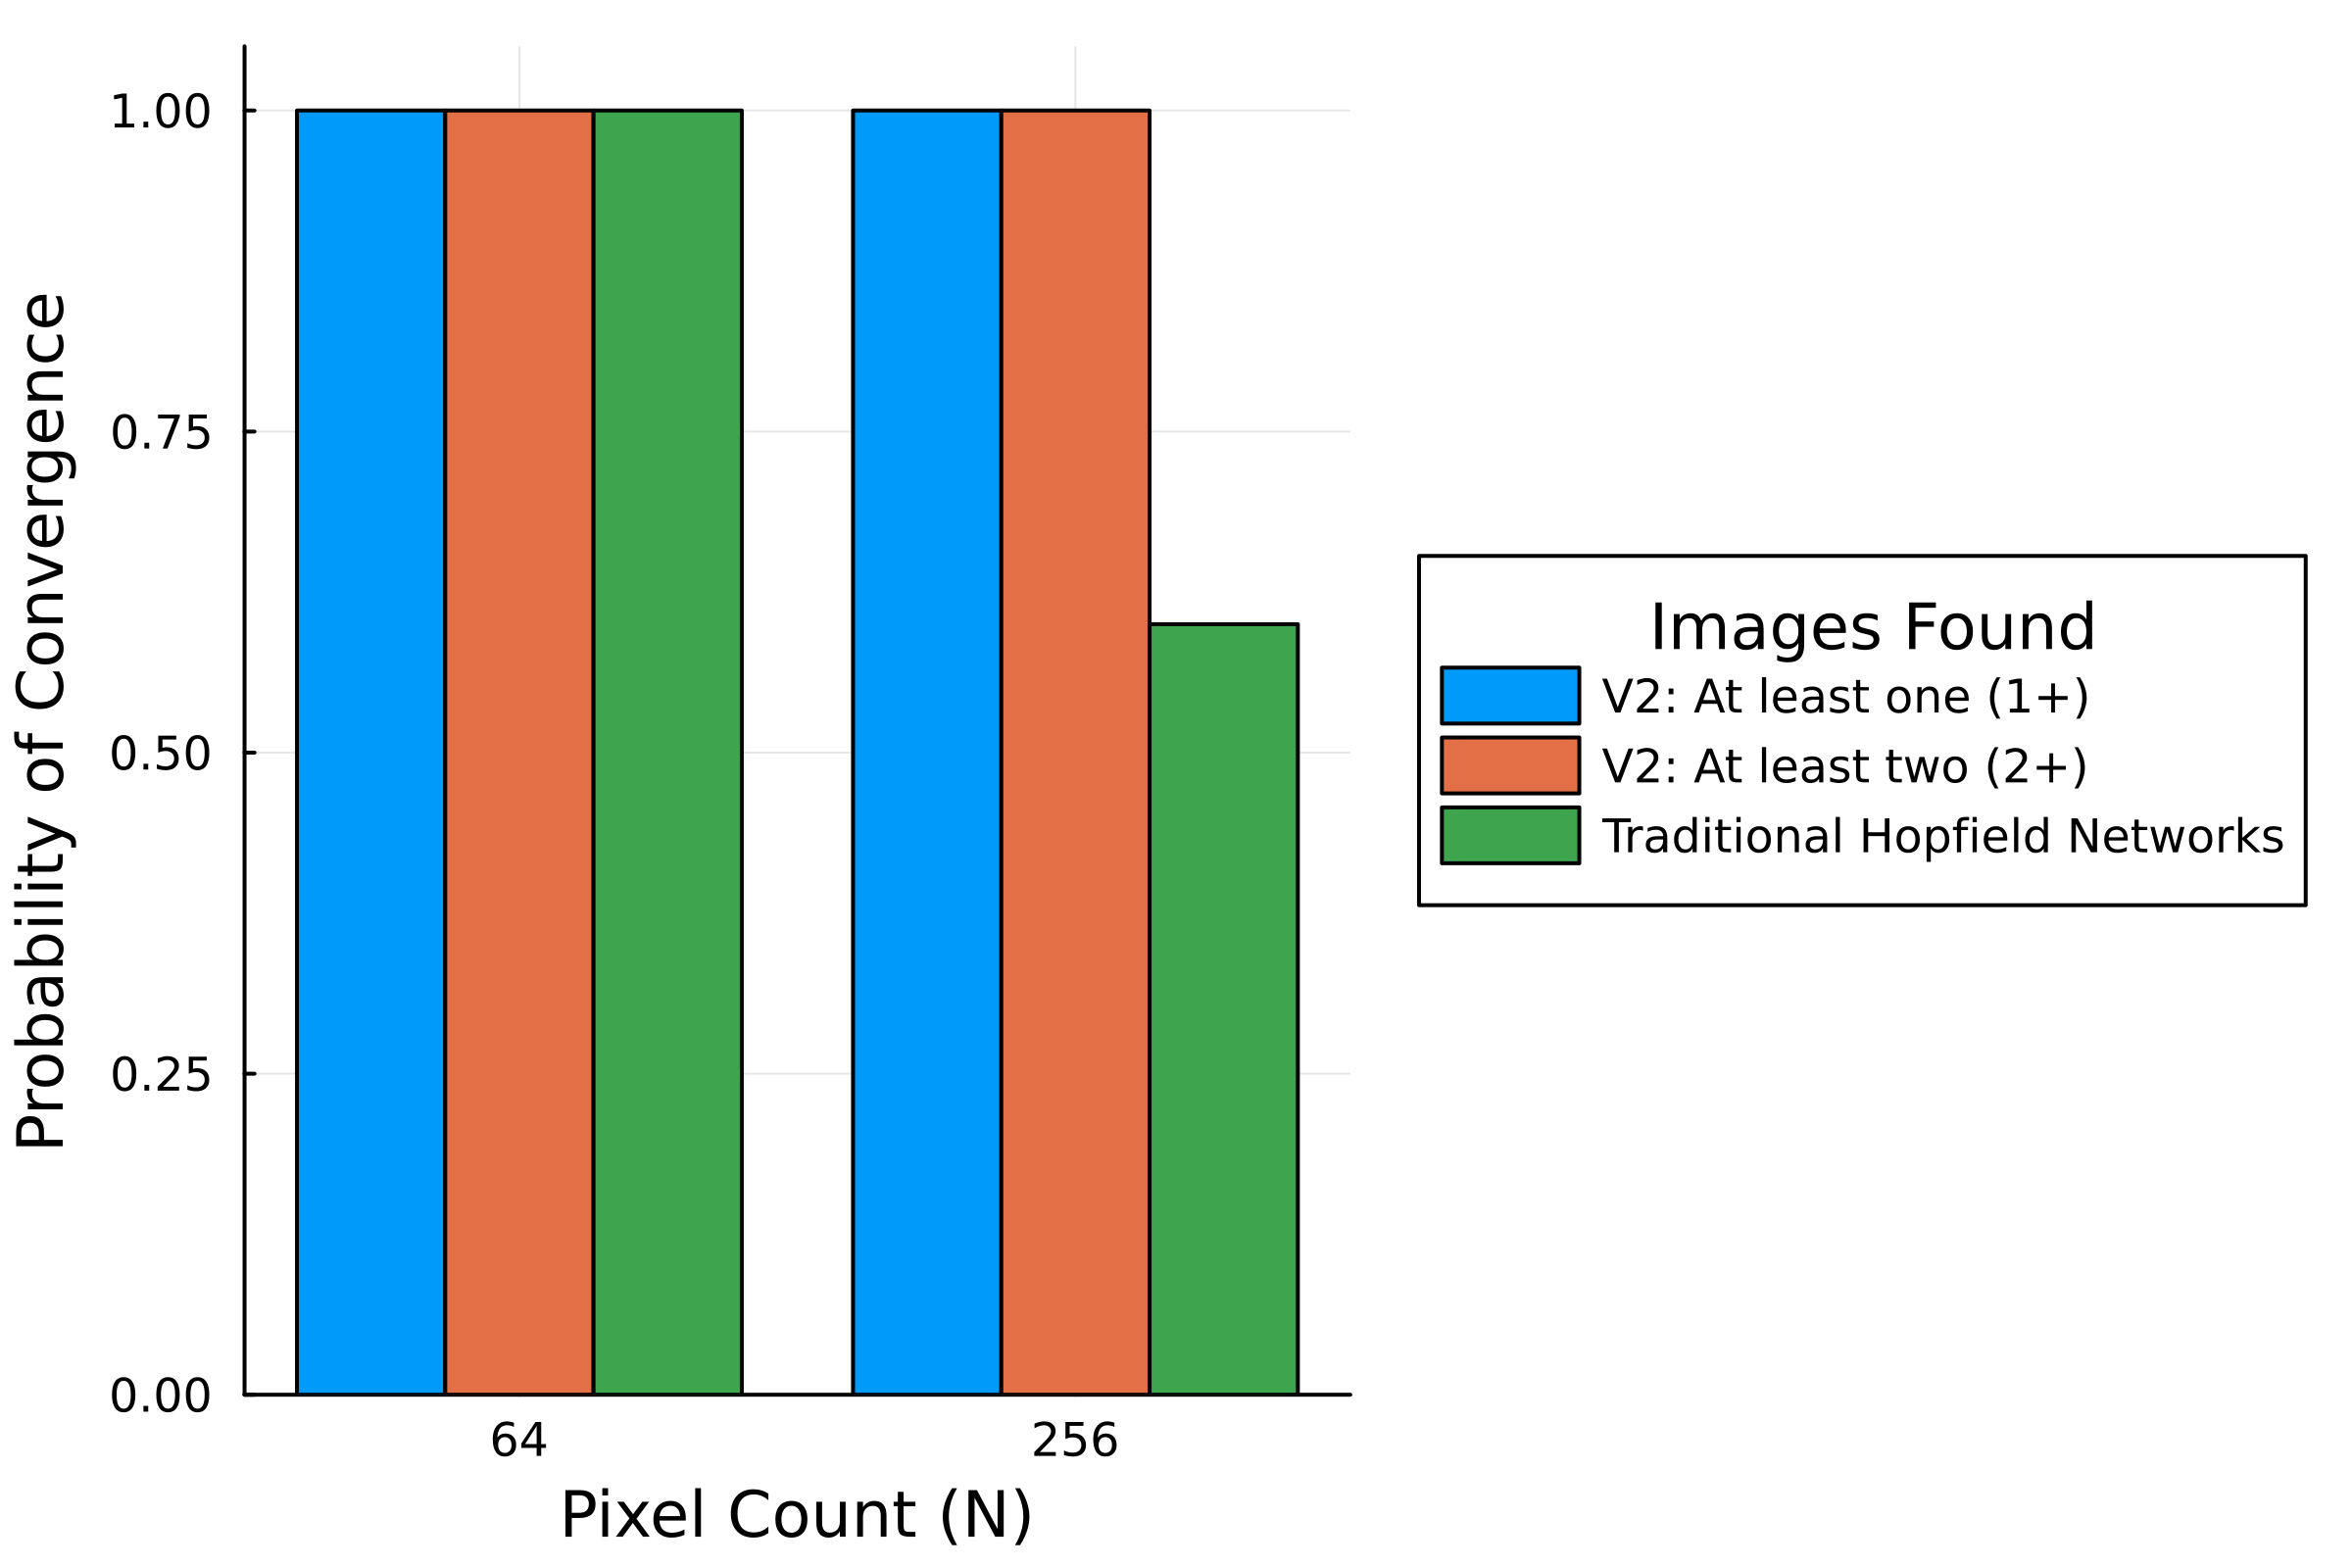

In [24]:
p = groupedbar(
    sizes, 
    [convs twos hns],
    bar_position = :dodge,
    labels = ["V2: At least one (1+)" "V2: At least two (2+)" "Traditional Hopfield Networks"],
    xlabel="Pixel Count (N)",
    ylabel="Probability of Convergence",
    legendtitle="Images Found",
    legend = :outerright,
    ylims = (0, 1.05),
    dpi = 400,
)

plot(p)

p = Plot{Plots.GRBackend() n=3}


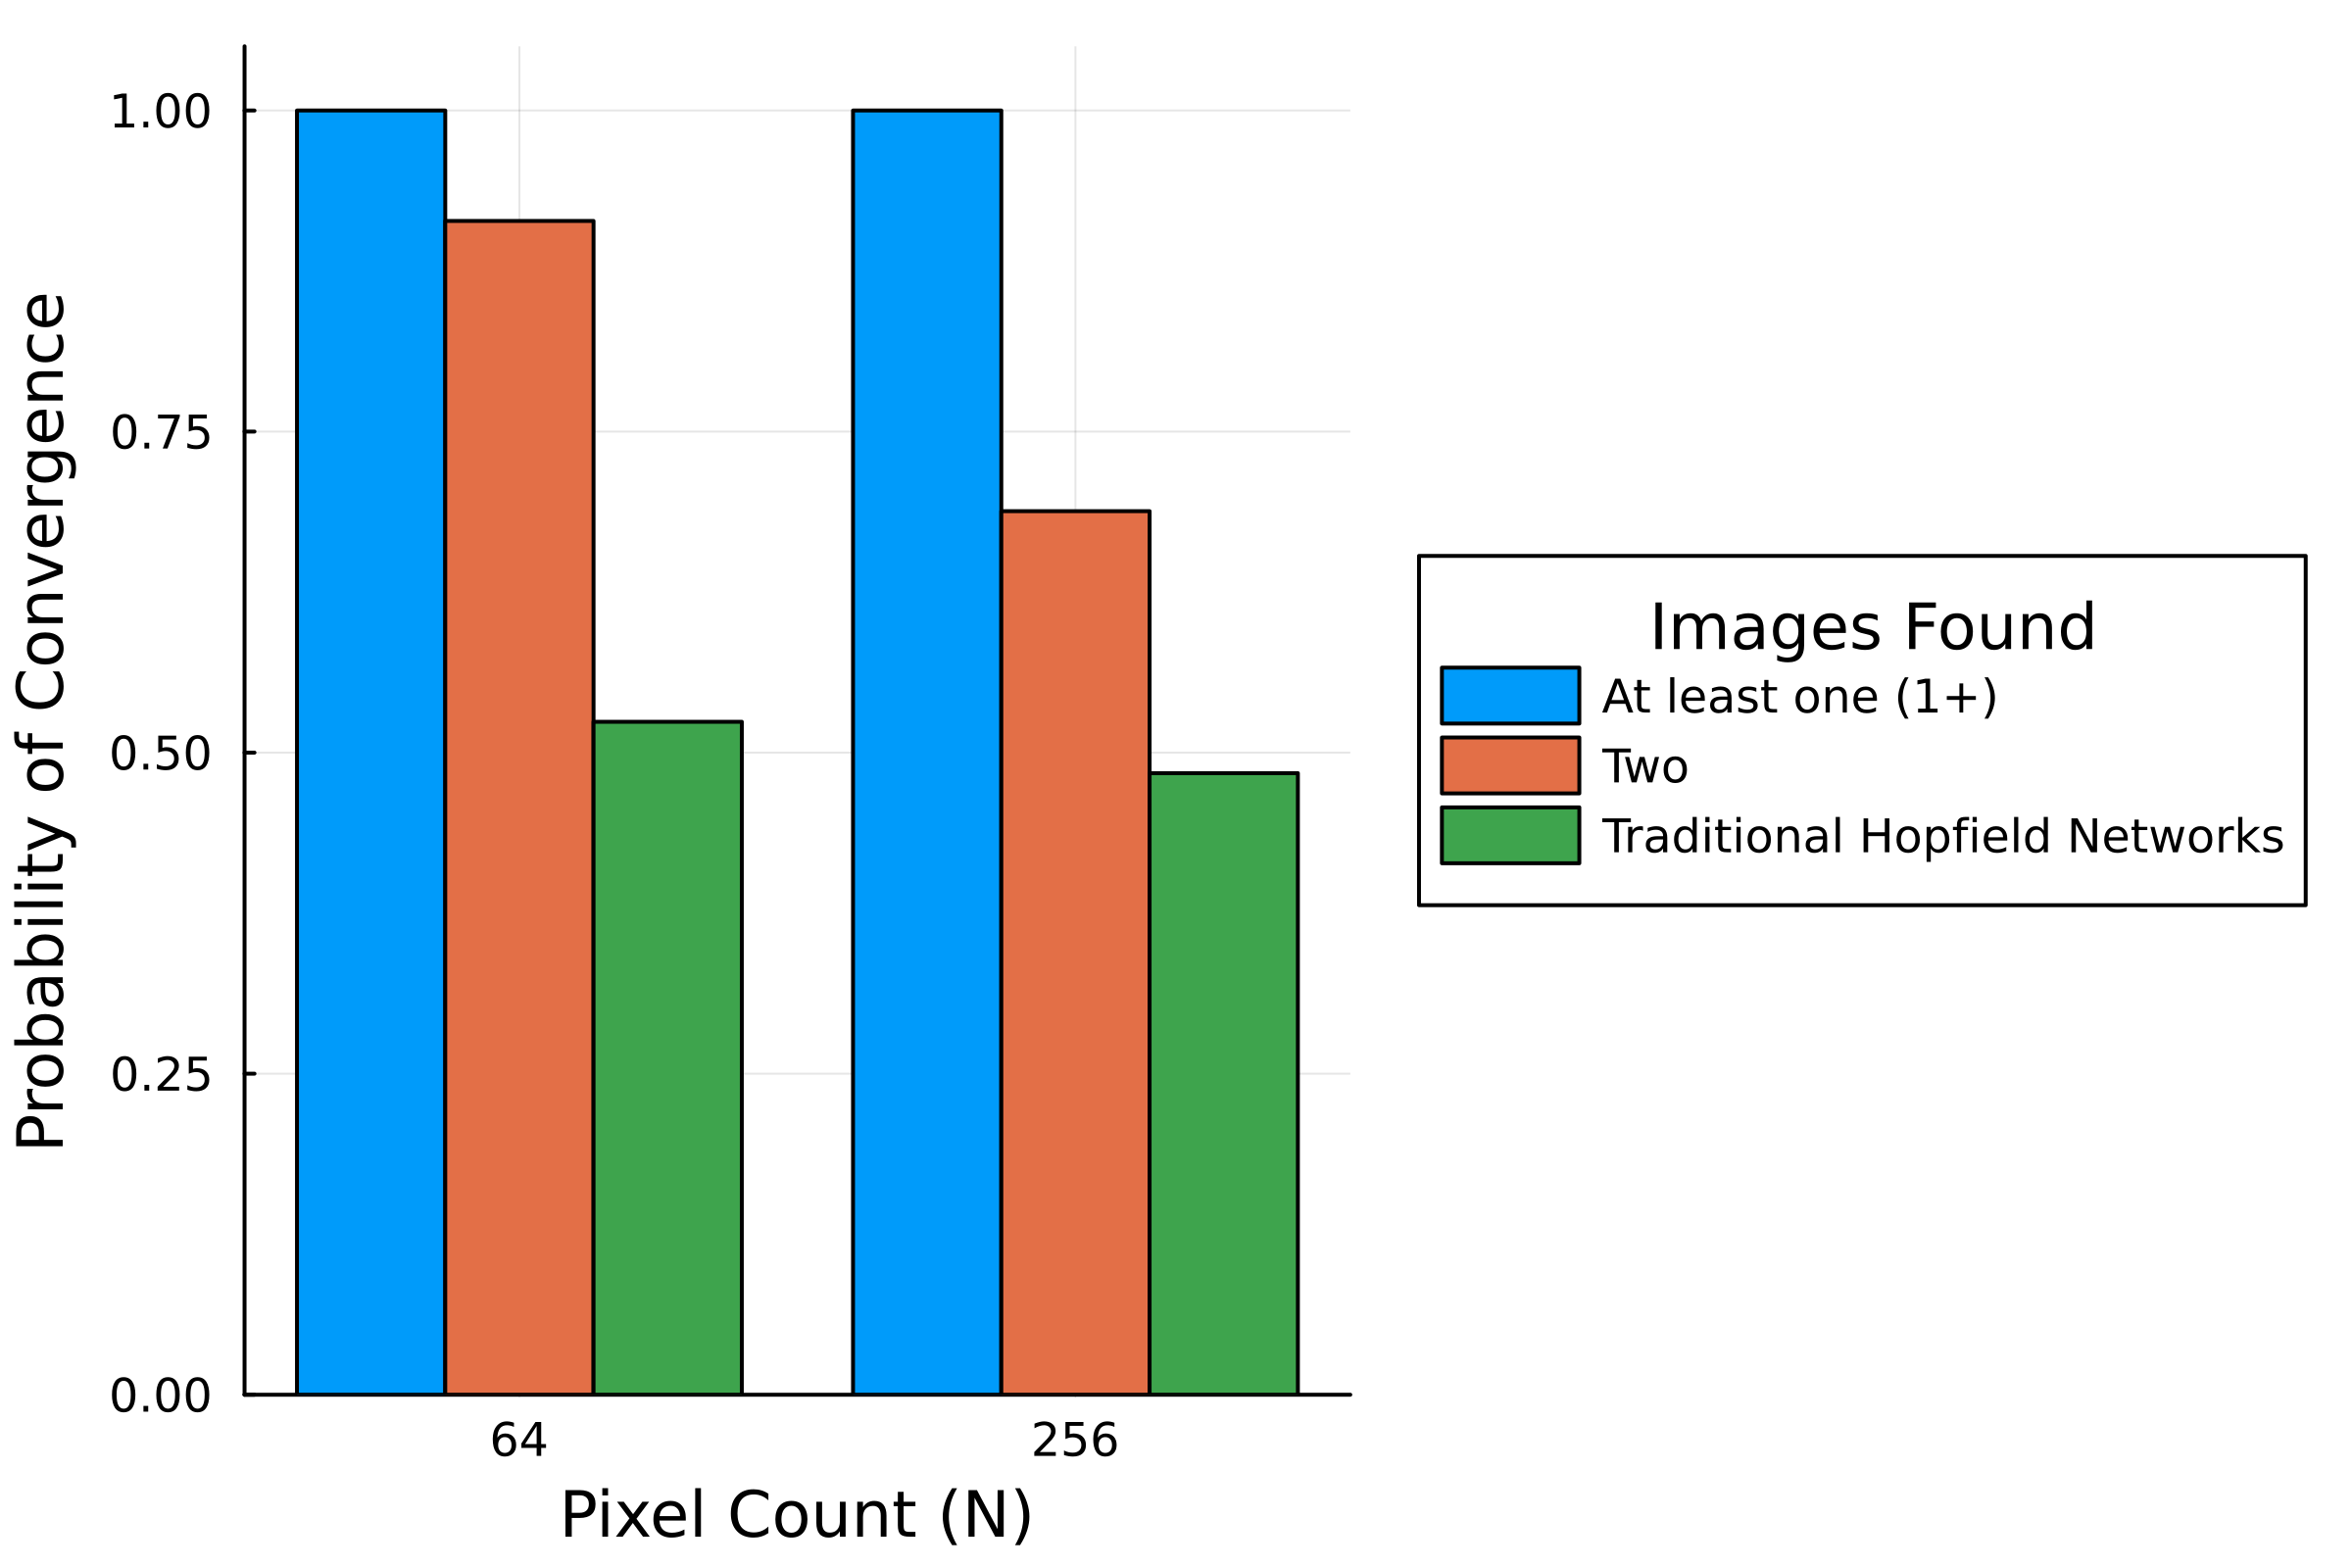

In [5]:

file_V2_8by8 = raw"C:\Users\qz202\OneDrive\Documents\Research Professor\Mikhail Erementchouk\HN_V2\HNV2 - Paper Figures FInal Stuffs\NEW\ThreeRandom\ThreeOrthogonal_V2_8x8_Raw_Data_detail_1000"
file_V2_16by16 = raw"C:\Users\qz202\OneDrive\Documents\Research Professor\Mikhail Erementchouk\HN_V2\HNV2 - Paper Figures FInal Stuffs\NEW\ThreeRandom\ThreeOrthogonal_V2_16x16_Raw_Data_detail_1000"

file_HN_8by8 = raw"C:\Users\qz202\OneDrive\Documents\Research Professor\Mikhail Erementchouk\HN_V2\HNV2 - Paper Figures FInal Stuffs\NEW\ThreeRandom\ThreeOrthogonal_HN_8x8_Raw_Data_detail_1000"
file_HN_16by16 = raw"C:\Users\qz202\OneDrive\Documents\Research Professor\Mikhail Erementchouk\HN_V2\HNV2 - Paper Figures FInal Stuffs\NEW\ThreeRandom\ThreeOrthogonal_HN_16x16_Raw_Data_detail_1000"

data_V2_8by8 = file_parser(file_V2_8by8)
data_HN_8by8 = file_parser(file_HN_8by8)
data_V2_16by16 = file_parser(file_V2_16by16)
data_HN_16by16 = file_parser(file_HN_16by16)

sizes = ["64", "256"]
convs = [data_V2_8by8[3][1], data_V2_16by16[1][1]]
twos = [data_V2_8by8[1][1], data_V2_16by16[3][1]]
hns = [data_HN_8by8[1][1], data_HN_16by16[1][1]]

detail = 1000

p = groupedbar(
    sizes, 
    [convs twos hns],
    #bar_position = :dodge,
    labels = ["At least one (1+)" "Two" "Traditional Hopfield Networks"],
    xlabel="Pixel Count (N)",
    ylabel="Probability of Convergence",
    legendtitle="Images Found",
    legend = :outerright,
    ylims = (0, 1.05),
    dpi = 400,
   
)
@show p
savefig(p, "ThreeOrthogonalImages_V2_detail_$(detail)_up2.png")
plot(p)